### THE SPARK FOUNDATION.

### Exploratory Data Analysis -Sports

### Author: Paritosh Raikar

### For this task we are performing Exploratory Data Analysis on dataset of Indian Premier League.

### Objective : To find out the most successful teams, players and factors contributing win or loss of a team. 

## Step 1: Importing all required librabries and Dataset.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('Modules are imported')

Modules are imported


In [90]:
df_matches = pd.read_csv(r'F:\Neeyati\Project\matches.csv')

In [91]:
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [92]:
df_deliveries = pd.read_csv(r'F:\Neeyati\Project\deliveries.csv')

In [93]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [94]:
df_matches.shape

(756, 18)

In [95]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [96]:
df_matches = df_matches.drop(['umpire1','umpire2','umpire3'],axis=1)

In [97]:
df_matches.shape

(756, 15)

In [98]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB


In [99]:
df_matches.isna().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [100]:
df_matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [101]:
df_matches[df_matches.city.isnull()][['city','date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


#### As these dates belongs to the matches where the city columns values are missing and we see that all these matches belong to the 2014 seasons,so we can use these dates and seasons year(2014) to find out the city of match.On web search we can check that all the matches with missing city was played at Dubai international stadium.

#### So we can fill this missing values with The Dubai.

In [102]:
df_matches.city = df_matches.city.fillna('Dubai')
df_matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

#### Now here we are able to see that City coloumn does't contain any null value.

#### Now Let's deal with the 'Winner' and 'player of match' column.

In [103]:
df_matches[df_matches.winner.isnull()][['result','winner','player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


#### We can see that the missing values of 'Winner' and 'Player_of_match' column corresponds to result column when there is no result of the match,so we don't need to remove this.

#### these null values are justified.

#### Reading second dataset.

In [104]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [105]:
df_deliveries.shape

(179078, 21)

In [106]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [107]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Analysis of IPL team.

In [108]:
teams = df_matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

#### here we can see that due to spelling mistake there are two columns with Pune Supergiants so let's fix it.

In [109]:
df_matches['winner'].replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)

In [110]:
teams = df_matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

#### Bothe the columns merge to single column.

### Total number of teams participated

In [111]:
len(teams)

14

####  14 teams participated till date.

 ### Teams with more number of wins.

In [112]:
teams = df_matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

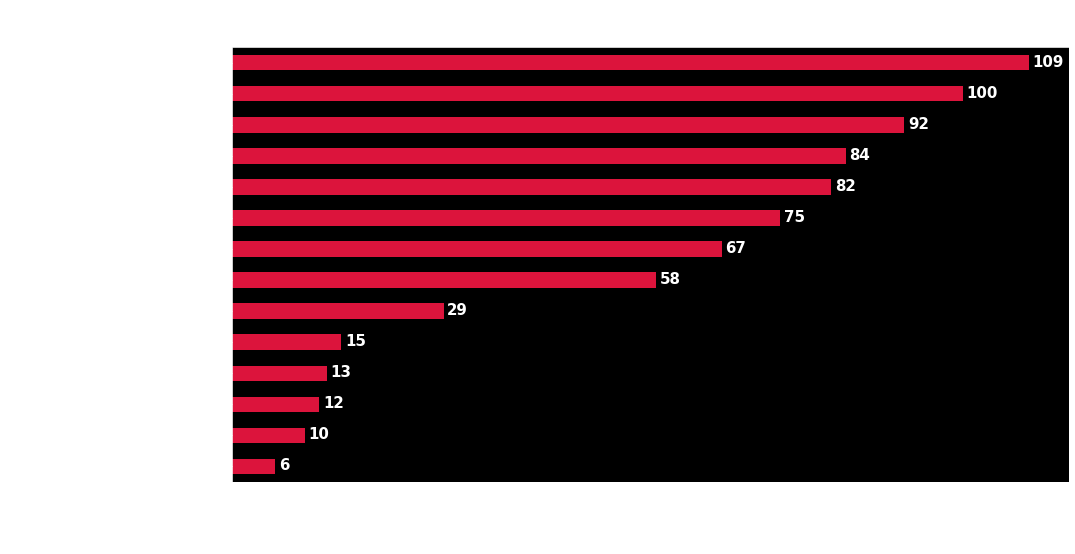

In [113]:
teams = teams.plot.barh(figsize=(15,8),color='crimson',fontsize=15)
plt.style.use('dark_background')
teams.set_title('Teams with Most No.of Wins\n',fontsize=18,fontweight='bold')
teams.set_xlabel('No.of Matches Won\n',fontsize=18,fontweight='bold')
teams.invert_yaxis()
for i in teams.patches:
    teams.text(i.get_width()+0.5,i.get_y()+.35,i.get_width(),fontsize=15,fontweight='bold', color ='white')

#### Mumbai Indians won Maximum number of matches(109) followed by Chennai Super Kings(100) and Kolkata Knight Riders.

In [114]:
df_matches['win_by_runs'].max()

146

#### 146 is maximum Run Count

In [115]:
df_matches.iloc[df_matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
Name: 43, dtype: object

#### This match was played between Mumbai Indians & Delhi Daredeils on 6th May 2017 at Venue Feroz Shah Kotla Stadium and player of teh match is LMP Simmons.

### Maximum Wickets

In [116]:
df_matches['win_by_wickets'].max()

10

### 10 wickets win is the maximum win by wickets. 

In [117]:
df_matches.iloc[df_matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
Name: 2, dtype: object

#### This match was played between Kolkata Knight Riders & Gujarat Lions on 7th april 2017 at Saurashtra cricket association Stadium,Rajkot and player of the match was CA Lynn.

In [118]:
more_10wickets_match = df_matches[df_matches.win_by_wickets==10]
more_10wickets_match

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ..."
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali"
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium


In [119]:
more_10wickets_match['winner'].value_counts()

Royal Challengers Bangalore    3
Kings XI Punjab                1
Delhi Daredevils               1
Kolkata Knight Riders          1
Deccan Chargers                1
Rajasthan Royals               1
Chennai Super Kings            1
Mumbai Indians                 1
Sunrisers Hyderabad            1
Name: winner, dtype: int64

In [120]:
more_10wickets_match['winner'].value_counts().sum()

11

#### We can see that there are total 11 matches where teams won by 10 wickets and Royal Challengers banglore is the only team that won by 10 wickets more than once(3 times).

### Team with most IPL title

In [121]:
# creating a sub-dataset
winners = df_matches[['season','winner']]

In [122]:
# Creating a empty dict for starting team name with most number of title.
team_with_most_title = {}
for i in sorted(winners.season.unique()):
    team_with_most_title[i]=winners[winners.season==i]['winner'].tail(1).values[0]
    
season_winner = pd.Series(team_with_most_title)
season_winner = pd.DataFrame(season_winner,columns=['Season_Winner'])

In [123]:
season_winner

,Season_Winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


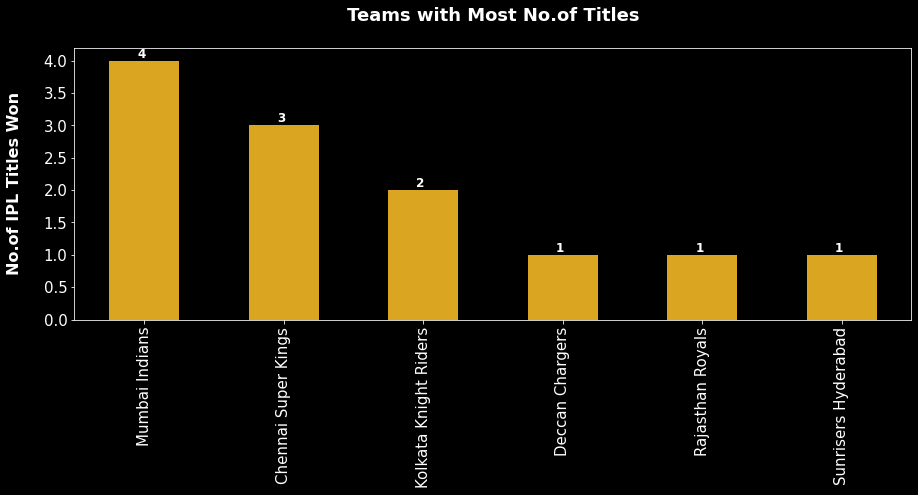

In [124]:
season_winner = season_winner['Season_Winner'].value_counts().plot(kind='bar',figsize=(15,5),color='goldenrod',fontsize=15)
plt.style.use('dark_background')
season_winner.set_title('Teams with Most No.of Titles\n',fontsize=18,fontweight='bold')
season_winner.set_ylabel('No.of IPL Titles Won\n',fontsize=16,fontweight='bold')

for i in season_winner.patches:
    season_winner.text(i.get_x()+0.20,i.get_height()+.05,i.get_height(),fontsize=12,fontweight='bold', color ='white')

#### Mumbai Indians with 4 IPL titles followed by Chennai Superkings(3) and then Kolkata Knight Riders(2) 

### Toss impact on team win

In [125]:
most_toss_win = df_matches['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

#### We can notice here that rising Pune Supergiant twice due to spellling mistake lets fix this.

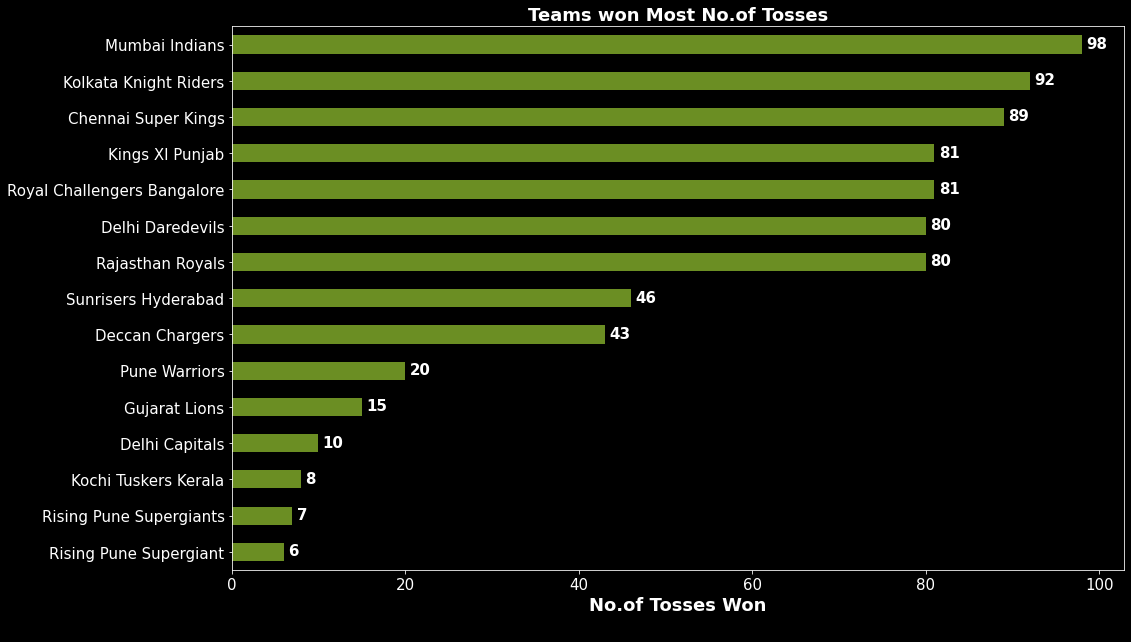

In [126]:
most_toss_win = most_toss_win.plot.barh(figsize=(16,10),color='olivedrab',fontsize=15)
plt.style.use('dark_background')
most_toss_win.set_title('Teams won Most No.of Tosses',fontsize=18,fontweight='bold')
most_toss_win.set_xlabel('No.of Tosses Won\n',fontsize=18,fontweight='bold')
most_toss_win.invert_yaxis()
for i in most_toss_win.patches:
    most_toss_win.text(i.get_width()+0.5,i.get_y()+.35,i.get_width(),fontsize=15,fontweight='bold', color ='white')

#### We can infer from above thatas no of tosses won increses the chance of einning the match will also br increased.

### Toss Decision

In [127]:
toss_decision = df_matches['toss_decision'].value_counts()
toss_decision

field    463
bat      293
Name: toss_decision, dtype: int64

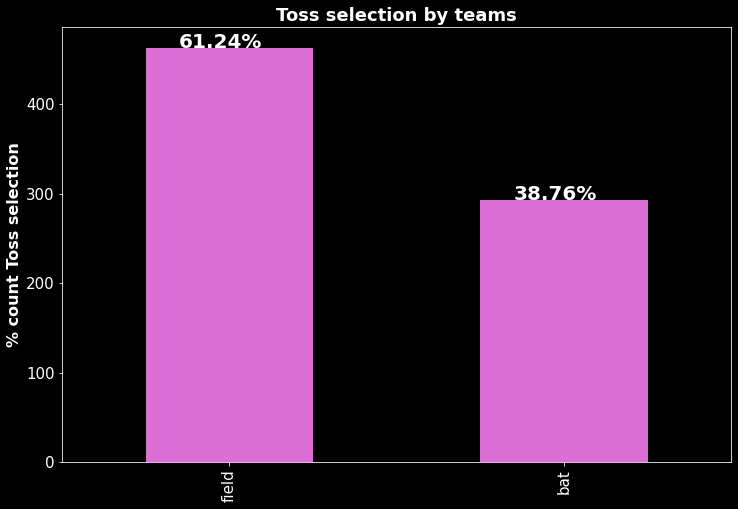

In [128]:
toss_decision = toss_decision.plot(kind='bar',figsize=(12,8),color='orchid',fontsize=15)
plt.style.use('dark_background')
toss_decision.set_title('Toss selection by teams',fontsize=18,fontweight='bold')
toss_decision.set_ylabel('% count Toss selection',fontsize=16,fontweight='bold')
totals = []
for i in toss_decision.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in toss_decision.patches:
    toss_decision.text(i.get_x()+0.10,i.get_height()+.01, 
                       str(round((i.get_height()/total)*100,2))+'%',
                       fontsize=20,fontweight='bold', color ='white')

#### From this anlysis we can infer that most of the teams prefered to feild when they won toss.

### Batting Analysis

In [129]:
most_win_batting_first = df_matches.winner[df_matches.win_by_runs!=0].value_counts()
most_win_batting_first

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

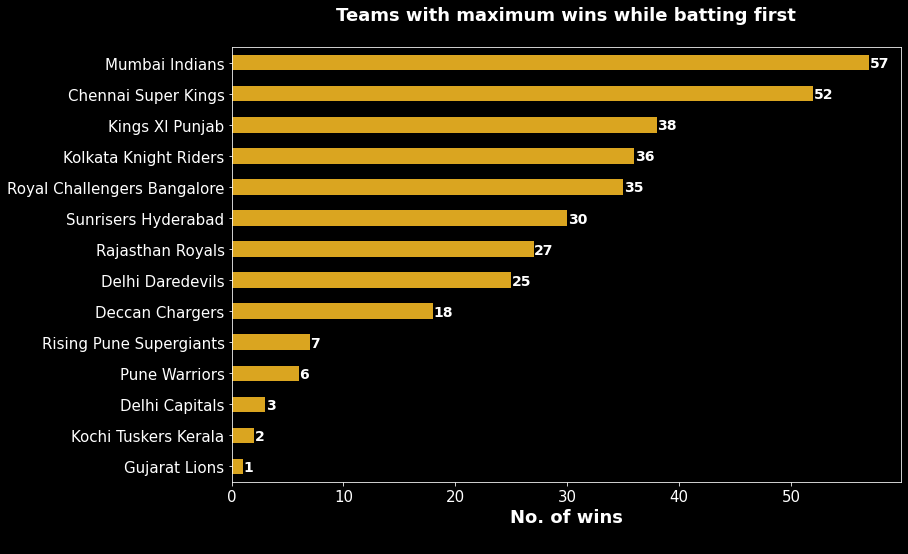

In [130]:
most_win_batting_first = most_win_batting_first.plot(kind='barh',figsize=(12,8),color='goldenrod',fontsize=15)
plt.style.use('dark_background')
most_win_batting_first.set_title('Teams with maximum wins while batting first\n',fontsize=18,fontweight='bold')
most_win_batting_first.set_xlabel('No. of wins\n',fontsize=18,fontweight='bold')
most_win_batting_first.invert_yaxis()

for i in most_win_batting_first.patches:
    most_win_batting_first.text(i.get_width()+0.05, i.get_y()+.40, i.get_width(),
                       fontsize=14,fontweight='bold', color ='white')

#### We can see that Mumabi Indians registered most wins while batting first as compared to others teams.So,from this analysis we can also say that Mumbai is the best team while defending the score.

In [131]:
most_win_batting_second = df_matches.winner[df_matches.win_by_wickets!=0].value_counts()
most_win_batting_second

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

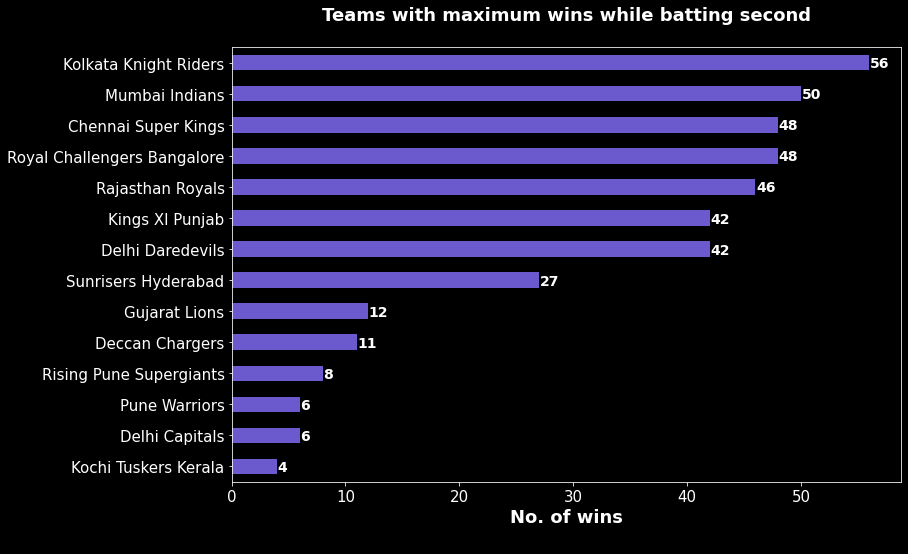

In [132]:
most_win_batting_second = most_win_batting_second.plot(kind='barh',figsize=(12,8),color='slateblue',fontsize=15)
plt.style.use('dark_background')
most_win_batting_second.set_title('Teams with maximum wins while batting second\n',fontsize=18,fontweight='bold')
most_win_batting_second.set_xlabel('No. of wins\n',fontsize=18,fontweight='bold')
most_win_batting_second.invert_yaxis()

for i in most_win_batting_second.patches:
    most_win_batting_second.text(i.get_width()+0.05, i.get_y()+.40, i.get_width(),
                       fontsize=14,fontweight='bold', color ='white')

#### We can see that Kolkata Knights Riders registered most wins while batting second as compared to other team.So from this analysisi we can also say that kolkata Knight Riders is the best team while chasing the target. 

## Conclusion

#### Total 14 teams participated in IPL over 11 years out of that 6 teams managed to wins IPL title.
#### Mumbai Indians is the most successeful team in the IPL (with 4 IPL title and most number of match wins(109) followed by Chennai Super Kings(with 3 IPl titles and 100 match of wins).
#### From toss analysis we can infer that the top three successful teams also won the Maximum number of tosses and the teams who won the toss preffered to feild first(61.2%).
#### Mumbai Indians is the most successful team while defending.
#### Kolkata Knights Riders is the most successful team while chasing.

### Analysis of Players

In [133]:
most_player_of_match = df_matches['player_of_match'].value_counts()[0:10]
most_player_of_match

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

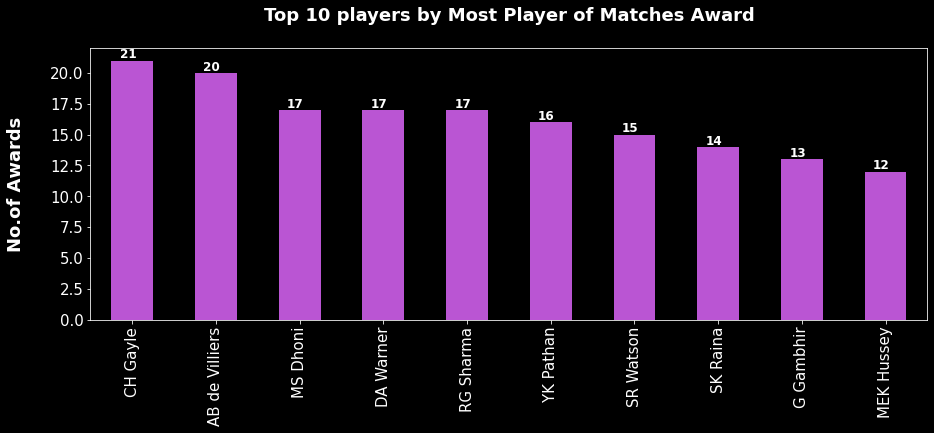

In [134]:
most_player_of_match = most_player_of_match.plot(kind='bar',figsize=(15,5),color='mediumorchid',fontsize=15)
plt.style.use('dark_background')
most_player_of_match.set_title('Top 10 players by Most Player of Matches Award\n',fontsize=18,fontweight='bold')
most_player_of_match.set_ylabel('No.of Awards\n',fontsize=18,fontweight='bold')

for i in most_player_of_match.patches:
   most_player_of_match.text(i.get_x()+0.10,i.get_height()+.2,i.get_height(),fontsize=12,fontweight='bold', color ='white')


#### We can see that CH Gayle got awarede with player of the match the most(21 times) followed by Ab de Villiers(20 times) and then DA Warner

### Batters/Bowlers Analysis

#### Number of players that batted for at least one ball in IPl so far 

In [135]:
batters = len(df_deliveries['batsman'].unique())
print(f'total no. of players that batted for at least one ball in the IPL so far: {batters}')

total no. of players that batted for at least one ball in the IPL so far: 516


#### Numbers of players that bowled at least one ball in the IPL so far

In [136]:
bowlers = len(df_deliveries['bowler'].unique())
print(f'total no. of players that bowled  at least one ball in the IPL so far: {bowlers}')

total no. of players that bowled  at least one ball in the IPL so far: 405


In [137]:
played_most_deliveries = df_deliveries['batsman'].value_counts()[0:10]
played_most_deliveries

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

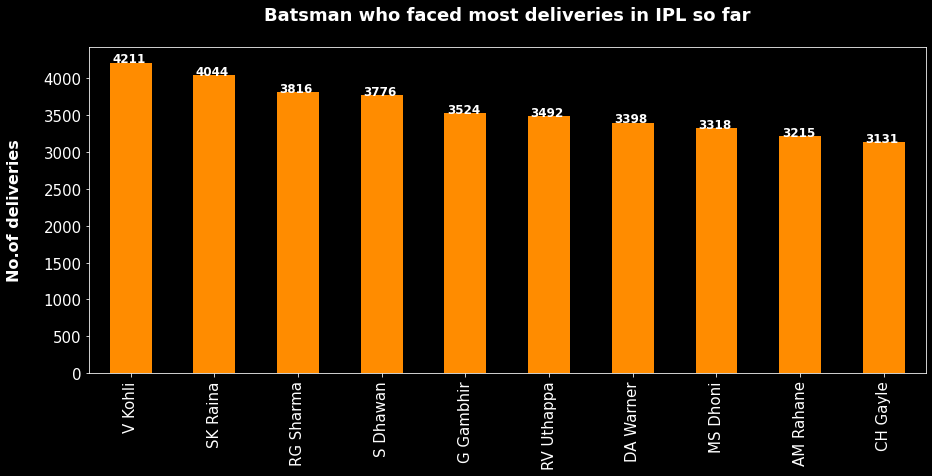

In [138]:
played_most_deliveries = played_most_deliveries.plot(kind='bar',figsize=(15,6),color='darkorange',fontsize=15)
plt.style.use('dark_background')
played_most_deliveries.set_title('Batsman who faced most deliveries in IPL so far\n',fontsize=18,fontweight='bold')
played_most_deliveries.set_ylabel('No.of deliveries\n',fontsize=16,fontweight='bold')

for i in played_most_deliveries.patches:
  played_most_deliveries.text(i.get_x()+0.03,i.get_height()+.60,i.get_height(),fontsize=12,fontweight='bold', color ='white')

 #### Virat Koli played most numbers of balls in the IPL history followed by SK Raina and RG Sharma. 

In [139]:
bowl_most_deliveries = df_deliveries['bowler'].value_counts()[0:10]
bowl_most_deliveries

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

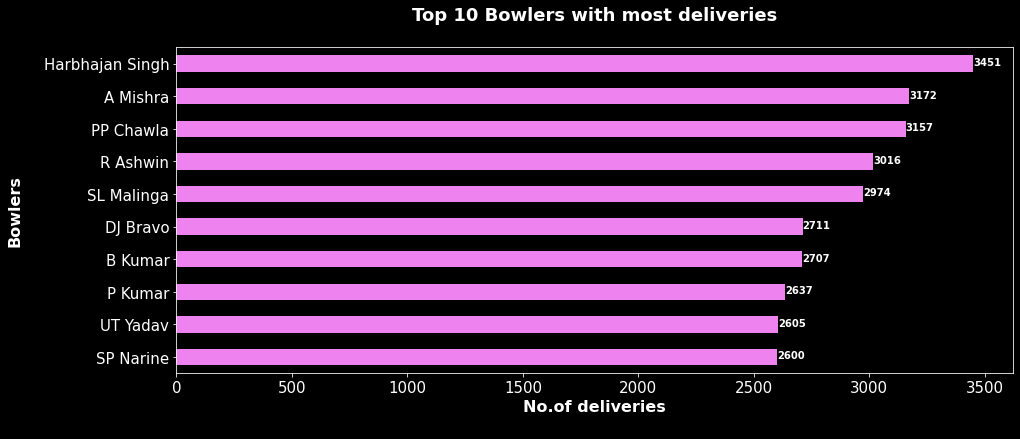

In [140]:
bowl_most_deliveries = bowl_most_deliveries.plot(kind='barh',figsize=(15,6),color='violet',fontsize=15)
plt.style.use('dark_background')
bowl_most_deliveries.set_title('Top 10 Bowlers with most deliveries\n',fontsize=18,fontweight='bold')
bowl_most_deliveries.set_xlabel('No.of deliveries\n',fontsize=16,fontweight='bold')
bowl_most_deliveries.set_ylabel('Bowlers\n',fontsize=16,fontweight='bold')

bowl_most_deliveries.invert_yaxis()

for i in bowl_most_deliveries.patches:
  bowl_most_deliveries.text(i.get_width()+0.5,i.get_y()+.30,i.get_width(),fontsize=10,fontweight='bold', color ='white')

#### Harbhanjan Singh bowled the maximum number of balls in IPL history.

In [141]:
top15_run_getter = df_deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[0:15]
top15_run_getter

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
AM Rahane         3850
KD Karthik        3688
SR Watson         3614
AT Rayudu         3326
YK Pathan         3241
Name: batsman_runs, dtype: int64

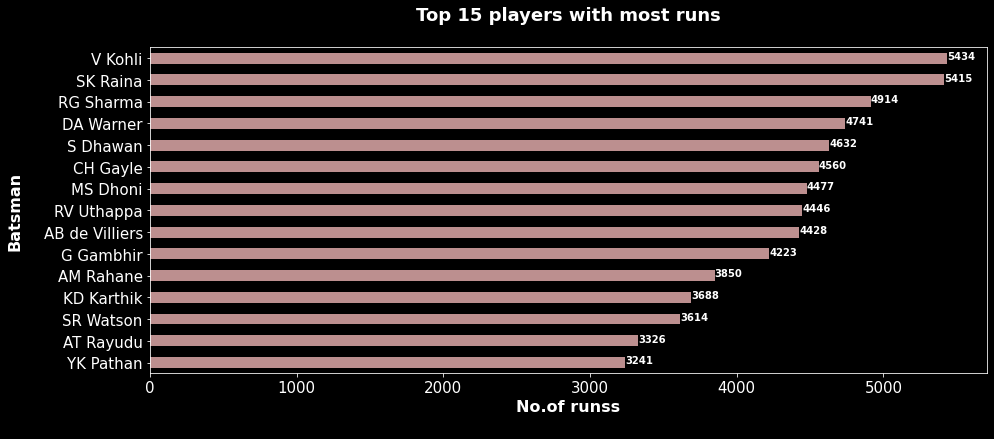

In [142]:
top15_run_getter = top15_run_getter.plot(kind='barh',figsize=(15,6),color='rosybrown',fontsize=15)
plt.style.use('dark_background')
top15_run_getter.set_title('Top 15 players with most runs\n',fontsize=18,fontweight='bold')
top15_run_getter.set_xlabel('No.of runss\n',fontsize=16,fontweight='bold')
top15_run_getter.set_ylabel('Batsman\n',fontsize=16,fontweight='bold')

top15_run_getter.invert_yaxis()

for i in top15_run_getter.patches:
  top15_run_getter.text(i.get_width()+0.5,i.get_y()+.30,i.get_width(),fontsize=10,fontweight='bold', color ='white')

#### We can see that Virat Koli is The top run scorer with 5343 runs ,followed by Suresh Raina with 5415 and so on. 

In [143]:
df = pd.merge(df_matches, df_deliveries, left_on ='id', right_on ='match_id')

In [144]:
vkohli = df[df['batsman'] == 'V Kohli']
vkohli = vkohli.groupby('season')['batsman_runs'].sum()
vkohli

season
2008    165
2009    246
2010    307
2011    557
2012    364
2013    639
2014    359
2015    505
2016    973
2017    308
2018    539
2019    472
Name: batsman_runs, dtype: int64

In [145]:
sraina = df[df['batsman'] == 'SK Raina']
sraina = sraina.groupby('season')['batsman_runs'].sum()
sraina

season
2008    421
2009    434
2010    528
2011    438
2012    441
2013    548
2014    523
2015    374
2016    399
2017    442
2018    466
2019    401
Name: batsman_runs, dtype: int64

In [146]:
rsharma = df[df['batsman'] == 'RG Sharma']
rsharma = rsharma.groupby('season')['batsman_runs'].sum()
rsharma

season
2008    404
2009    362
2010    404
2011    372
2012    433
2013    538
2014    390
2015    482
2016    489
2017    333
2018    297
2019    410
Name: batsman_runs, dtype: int64

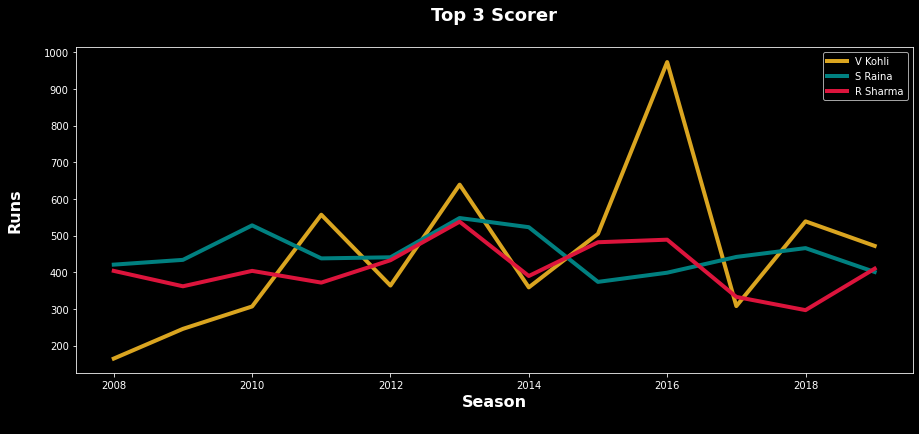

In [147]:
vkohli.plot(kind='line', linewidth = 4, figsize=(15,6), color='goldenrod',label='V Kohli')
sraina.plot(kind='line', linewidth = 4, figsize=(15,6), color='teal',label='S Raina')
rsharma.plot(kind='line', linewidth = 4, figsize=(15,6), color='crimson',label='R Sharma')
plt.style.use('dark_background')

plt.title('Top 3 Scorer\n',fontsize=18,fontweight='bold')
plt.xlabel('Season\n',fontsize=16,fontweight='bold')
plt.ylabel('Runs\n',fontsize=16,fontweight='bold')

plt.legend()
plt.show()

#### From this we can infer that
#### a) Suresh Raina is the most consistent player in the IPL history.
#### b) Rohit Sharma is also consistent but not as consistent as Raina.
#### c)Virat Koli did't started his career well in IPL .We can see there are sharp Rise & Decline of runs tred in alternate seasons and as we can see a shape rise in Virat Koli is least consistent among the three players.

### Extra Runs

In [148]:
extra_runs = df_deliveries.groupby('bowler')['extra_runs'].sum().sort_values(ascending = False)[0:15]
extra_runs

bowler
SL Malinga         293
P Kumar            236
UT Yadav           219
DJ Bravo           201
B Kumar            197
I Sharma           194
RP Singh           181
DW Steyn           171
SR Watson          171
Harbhajan Singh    170
Z Khan             169
R Ashwin           167
JA Morkel          153
DS Kulkarni        145
IK Pathan          142
Name: extra_runs, dtype: int64

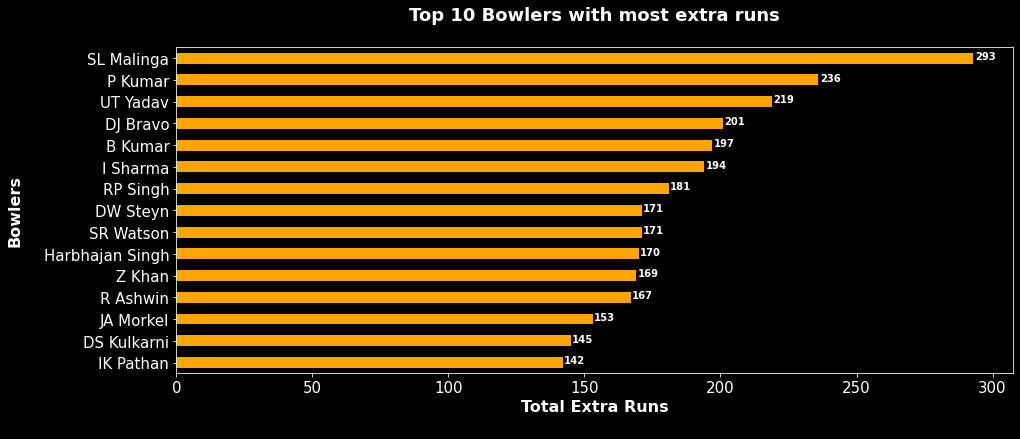

In [149]:
extra_runs = extra_runs.plot(kind='barh',figsize=(15,6),color='orange',fontsize=15)
plt.style.use('dark_background')
extra_runs.set_title('Top 10 Bowlers with most extra runs\n',fontsize=18,fontweight='bold')
extra_runs.set_xlabel('Total Extra Runs\n',fontsize=16,fontweight='bold')
extra_runs.set_ylabel('Bowlers\n',fontsize=16,fontweight='bold')

extra_runs.invert_yaxis()

for i in extra_runs.patches:
  extra_runs.text(i.get_width()+0.5,i.get_y()+.30,i.get_width(),fontsize=10,fontweight='bold', color ='white')

#### SL Malinga conceded the most extra runs in th history of IPL.

#### Which bowler Dissmissed which batsman the most?

In [150]:
bowl_bat = df_deliveries.groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending = False)[0:15]
bowl_bat

bowler         player_dismissed
Z Khan         MS Dhoni            7
PP Ojha        MS Dhoni            7
SP Narine      RG Sharma           6
B Kumar        PA Patel            6
               AM Rahane           6
R Ashwin       RV Uthappa          6
A Mishra       RG Sharma           6
PP Chawla      AT Rayudu           6
Z Khan         G Gambhir           6
R Vinay Kumar  RG Sharma           6
A Nehra        V Kohli             6
MM Sharma      AT Rayudu           6
RA Jadeja      SR Watson           5
               SPD Smith           5
Imran Tahir    Ishan Kishan        5
Name: player_dismissed, dtype: int64

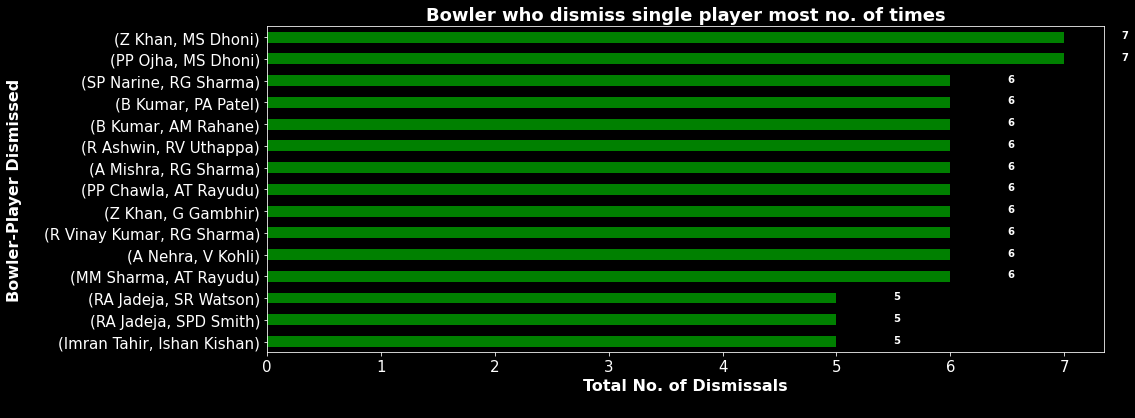

In [151]:
bowl_bat = bowl_bat.plot(kind='barh',figsize=(15,6),color='green',fontsize=15)
plt.style.use('dark_background')
bowl_bat.set_title('Bowler who dismiss single player most no. of times',fontsize=18,fontweight='bold')
bowl_bat.set_xlabel('Total No. of Dismissals\n',fontsize=16,fontweight='bold')
bowl_bat.set_ylabel('Bowler-Player Dismissed\n',fontsize=16,fontweight='bold')

bowl_bat.invert_yaxis()

for i in bowl_bat.patches:
  bowl_bat.text(i.get_width()+0.5,i.get_y()+.30,i.get_width(),fontsize=10,fontweight='bold', color ='white')

### Fromm this analysis we can infer that M.S.Dhoni can't play well against Zaher Khan and Pragyan Ojha as they dismissed him the most number of times(7) followed by Rohit Sharma 6 times dismissed by 3 Bowlers each (Vinay Kumar and SP Narine

#### Players who got dismissed most numbers of times

In [152]:
got_dismissed = df_deliveries['player_dismissed'].value_counts()[0:15]
got_dismissed

SK Raina          162
RG Sharma         155
RV Uthappa        153
V Kohli           143
S Dhawan          137
G Gambhir         136
KD Karthik        135
PA Patel          126
AM Rahane         116
AT Rayudu         115
SR Watson         115
Yuvraj Singh      111
DA Warner         110
AB de Villiers    110
YK Pathan         110
Name: player_dismissed, dtype: int64

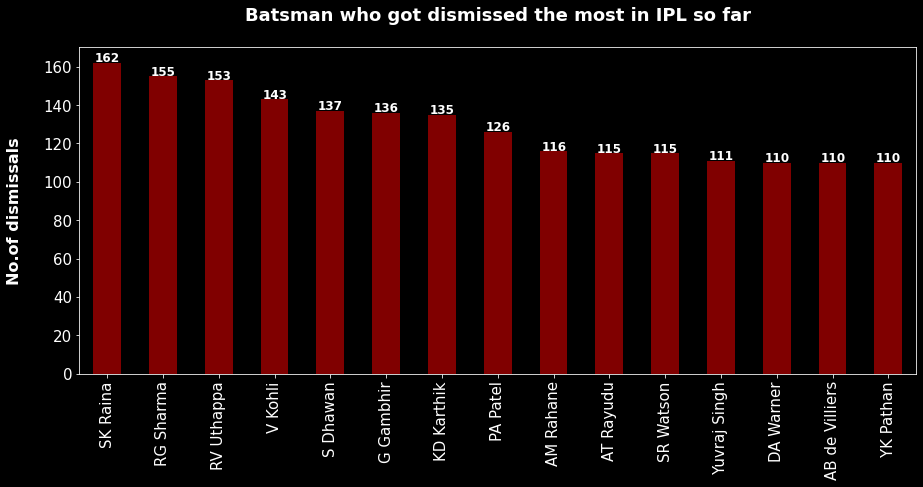

In [153]:
got_dismissed = got_dismissed.plot(kind='bar',figsize=(15,6),color='maroon',fontsize=15)
plt.style.use('dark_background')
got_dismissed.set_title('Batsman who got dismissed the most in IPL so far\n',fontsize=18,fontweight='bold')
got_dismissed.set_ylabel('No.of dismissals\n',fontsize=16,fontweight='bold')

for i in got_dismissed.patches:
  got_dismissed.text(i.get_x()+0.03,i.get_height()+.60,i.get_height(),fontsize=12,fontweight='bold', color ='white')

#### SK Raina got Out(162 times) the most in he history of IPL,followed by RG Sharma and RV Uthappa.

#### Bowlers by dot balls

In [154]:
most_dot_by_bowler = df_deliveries.bowler[df_deliveries.total_runs==0].value_counts()[0:12]
most_dot_by_bowler

Harbhajan Singh    1244
SL Malinga         1144
B Kumar            1116
A Mishra           1108
PP Chawla          1100
P Kumar            1075
R Ashwin           1067
SP Narine          1038
DW Steyn            996
UT Yadav            942
Z Khan              873
IK Pathan           835
Name: bowler, dtype: int64

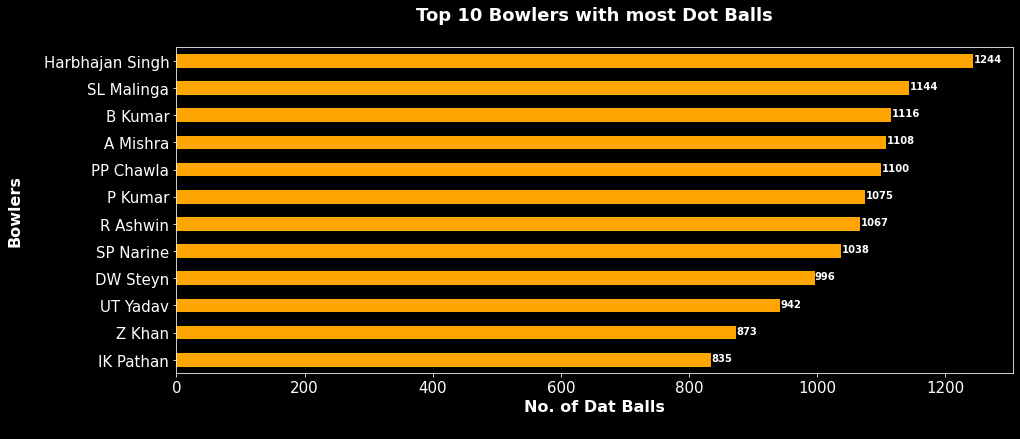

In [155]:
most_dot_by_bowler = most_dot_by_bowler.plot(kind='barh',figsize=(15,6),color='orange',fontsize=15)
plt.style.use('dark_background')
most_dot_by_bowler.set_title('Top 10 Bowlers with most Dot Balls\n',fontsize=18,fontweight='bold')
most_dot_by_bowler.set_xlabel('No. of Dat Balls\n',fontsize=16,fontweight='bold')
most_dot_by_bowler.set_ylabel('Bowlers\n',fontsize=16,fontweight='bold')

most_dot_by_bowler.invert_yaxis()

for i in most_dot_by_bowler.patches:
  most_dot_by_bowler.text(i.get_width()+0.5,i.get_y()+.30,i.get_width(),fontsize=10,fontweight='bold', color ='white')

#### Harbhajan Singh Holda the record for most dot balls in the history of IPL.We can also see that out of top 5 bowlers with most dot balls three of them are spinners, so we can infer that spinners are ahed in terms of orders of dot balls.

In [156]:
most_dismissal_by_player = df_deliveries['fielder'].value_counts()[0:10]
most_dismissal_by_player

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
NV Ojha            82
Name: fielder, dtype: int64

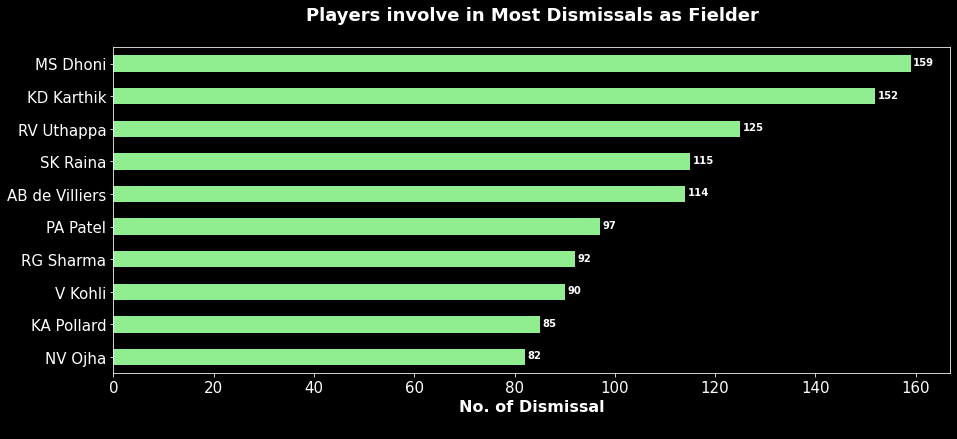

In [157]:
most_dismissal_by_player = most_dismissal_by_player.plot(kind='barh',figsize=(15,6),color='lightgreen',fontsize=15)
plt.style.use('dark_background')
most_dismissal_by_player.set_title('Players involve in Most Dismissals as Fielder\n',fontsize=18,fontweight='bold')
most_dismissal_by_player.set_xlabel('No. of Dismissal\n',fontsize=16,fontweight='bold')

most_dismissal_by_player.invert_yaxis()

for i in most_dismissal_by_player.patches:
  most_dismissal_by_player.text(i.get_width()+0.5,i.get_y()+.30,i.get_width(),fontsize=10,fontweight='bold', color ='white')

#### M.S.Dhoni involve in the most number of dismissal(159) as fielders followed by KD Karthik(152) and RV Utappa(125)

### Conclusion(Analysis of IPL Players)


#### Top 15 players by most runs category are dominated by the Indians and Virat Kolhi is on top with 5343 runs followed by Suresh Raina (5415) and rohit Sharma(4914)
#### Fromm top 3 players(run wise) anlysis we can infer that Suresh Raina is the most consistent player than Virat Kolhi and Rohit Sharma.
#### Most player of the match award are won by big hilter with Chris Gayle at top 21 players of the match award followed by ABD vilers(with 20 players of Match Awards) and from this analsis we can say that they are also the most valuable players to their respective teams over the years.
#### Harbhajan Singh bowled the most deliveries in IPl while Virat Kolhi faces most deliveries as a batsman.
#### Harbhajan singh holds the record for thr most dot balls in IPL so far.

In [158]:
venue_city = df_matches.groupby('venue')['city'].value_counts().sort_values(ascending = False)[0:12]
venue_city

venue                                       city      
Eden Gardens                                Kolkata       77
Wankhede Stadium                            Mumbai        73
Feroz Shah Kotla                            Delhi         67
M Chinnaswamy Stadium                       Bangalore     66
Rajiv Gandhi International Stadium, Uppal   Hyderabad     56
MA Chidambaram Stadium, Chepauk             Chennai       49
Sawai Mansingh Stadium                      Jaipur        47
Punjab Cricket Association Stadium, Mohali  Chandigarh    35
Maharashtra Cricket Association Stadium     Pune          21
Dr DY Patil Sports Academy                  Mumbai        17
Subrata Roy Sahara Stadium                  Pune          17
Kingsmead                                   Durban        15
Name: city, dtype: int64

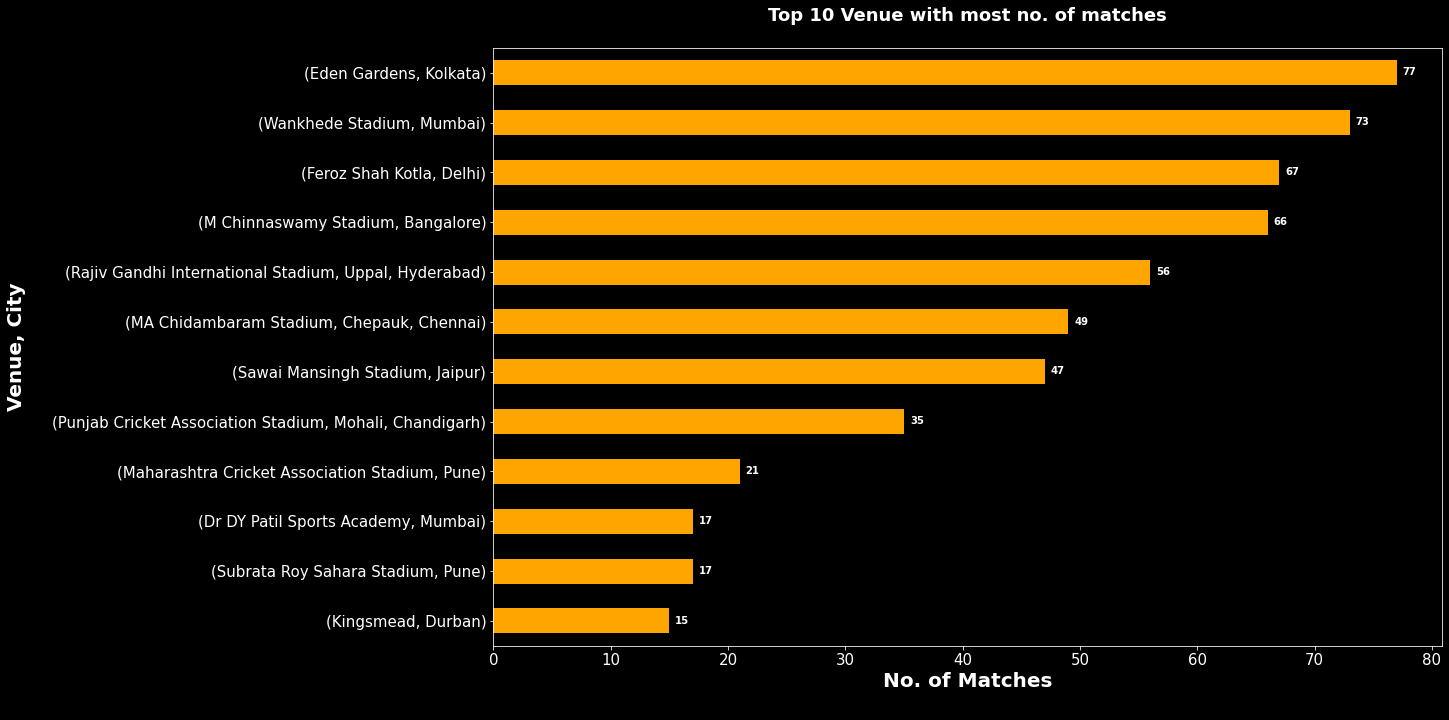

In [159]:
venue_city = venue_city.plot(kind='barh',figsize=(17,11),color='orange',fontsize=15)
plt.style.use('dark_background')
venue_city.set_title('Top 10 Venue with most no. of matches\n',fontsize=18,fontweight='bold')
venue_city.set_xlabel('No. of Matches\n',fontsize=20,fontweight='bold')
venue_city.set_ylabel('Venue, City\n',fontsize=20,fontweight='bold')

venue_city.invert_yaxis()

for i in venue_city.patches:
  venue_city.text(i.get_width()+0.5,i.get_y()+.30,i.get_width(),fontsize=10,fontweight='bold', color ='white')

In [160]:
season_wise_matches = df_matches['season'].value_counts()
season_wise_matches

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

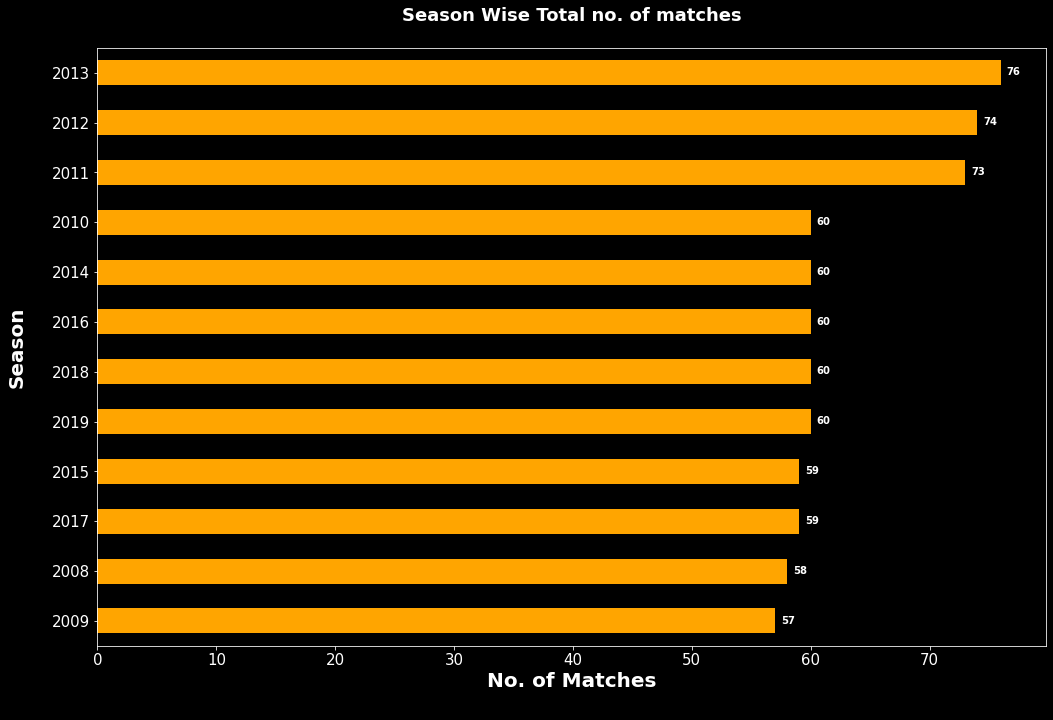

In [161]:
season_wise_matches = season_wise_matches.plot(kind='barh',figsize=(17,11),color='orange',fontsize=15)
plt.style.use('dark_background')
season_wise_matches.set_title('Season Wise Total no. of matches\n',fontsize=18,fontweight='bold')
season_wise_matches.set_xlabel('No. of Matches\n',fontsize=20,fontweight='bold')
season_wise_matches.set_ylabel('Season\n',fontsize=20,fontweight='bold')

season_wise_matches.invert_yaxis()

for i in season_wise_matches.patches:
  season_wise_matches.text(i.get_width()+0.5,i.get_y()+.30,i.get_width(),fontsize=10,fontweight='bold', color ='white')

In [162]:
match_result = df_matches['result'].value_counts()
match_result

normal       743
tie            9
no result      4
Name: result, dtype: int64

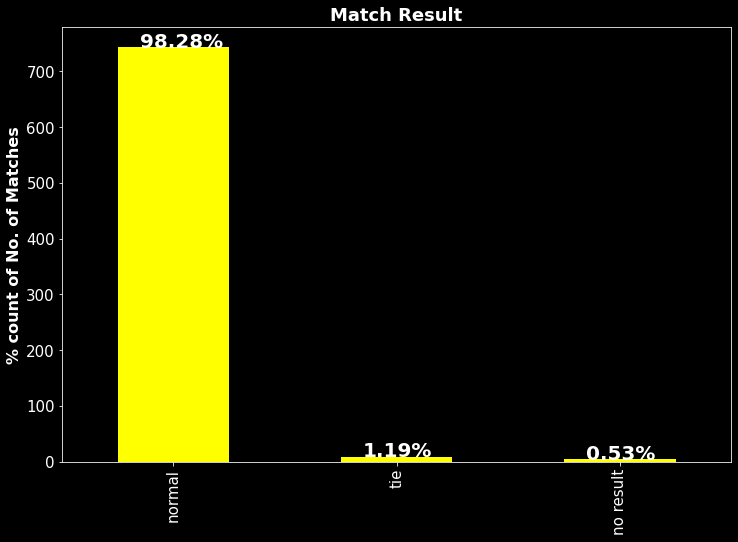

In [163]:
match_result = match_result.plot(kind='bar',figsize=(12,8),color='yellow',fontsize=15)
plt.style.use('dark_background')
match_result.set_title('Match Result',fontsize=18,fontweight='bold')
match_result.set_ylabel('% count of No. of Matches',fontsize=16,fontweight='bold')
totals = []
for i in match_result.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in match_result.patches:
    match_result.text(i.get_x()+0.10,i.get_height()+.01, 
                       str(round((i.get_height()/total)*100,2))+'%',
                       fontsize=20,fontweight='bold', color ='white')

In [164]:
dl_rule = df_matches['dl_applied'].value_counts()
dl_rule

0    737
1     19
Name: dl_applied, dtype: int64

In [165]:
dl_rule = df_matches['dl_applied'].replace(to_replace=1,value='Applied',inplace=True)
dl_rule = df_matches['dl_applied'].replace(to_replace=0,value='Not Applied',inplace=True)

In [166]:
dl_rule = df_matches['dl_applied'].value_counts()
dl_rule

Not Applied    737
Applied         19
Name: dl_applied, dtype: int64

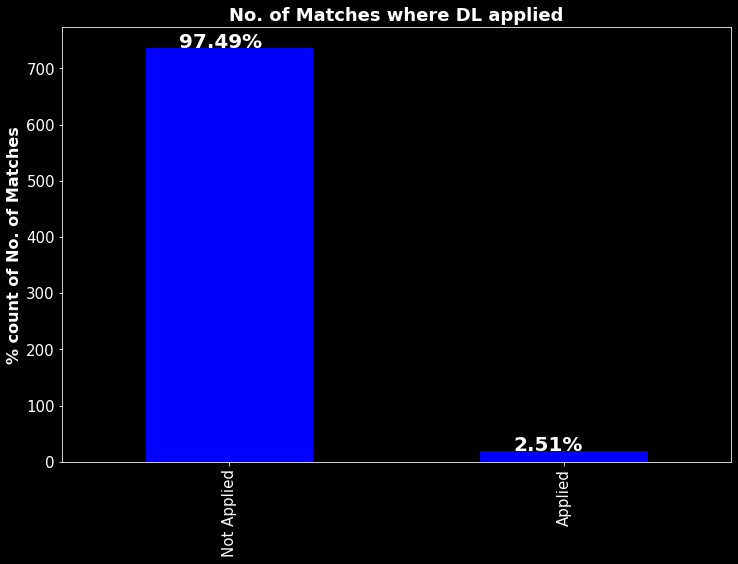

In [167]:
dl_rule = dl_rule.plot(kind='bar',figsize=(12,8),color='blue',fontsize=15)
plt.style.use('dark_background')
dl_rule.set_title('No. of Matches where DL applied',fontsize=18,fontweight='bold')
dl_rule.set_ylabel('% count of No. of Matches',fontsize=16,fontweight='bold')
totals = []
for i in dl_rule.patches:
    totals.append(i.get_height())
    
total = sum(totals)

for i in dl_rule.patches:
    dl_rule.text(i.get_x()+0.10,i.get_height()+.01, 
                       str(round((i.get_height()/total)*100,2))+'%',
                       fontsize=20,fontweight='bold', color ='white')

In [168]:
dismissal_type = df_deliveries['dismissal_kind'].value_counts()
dismissal_type

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

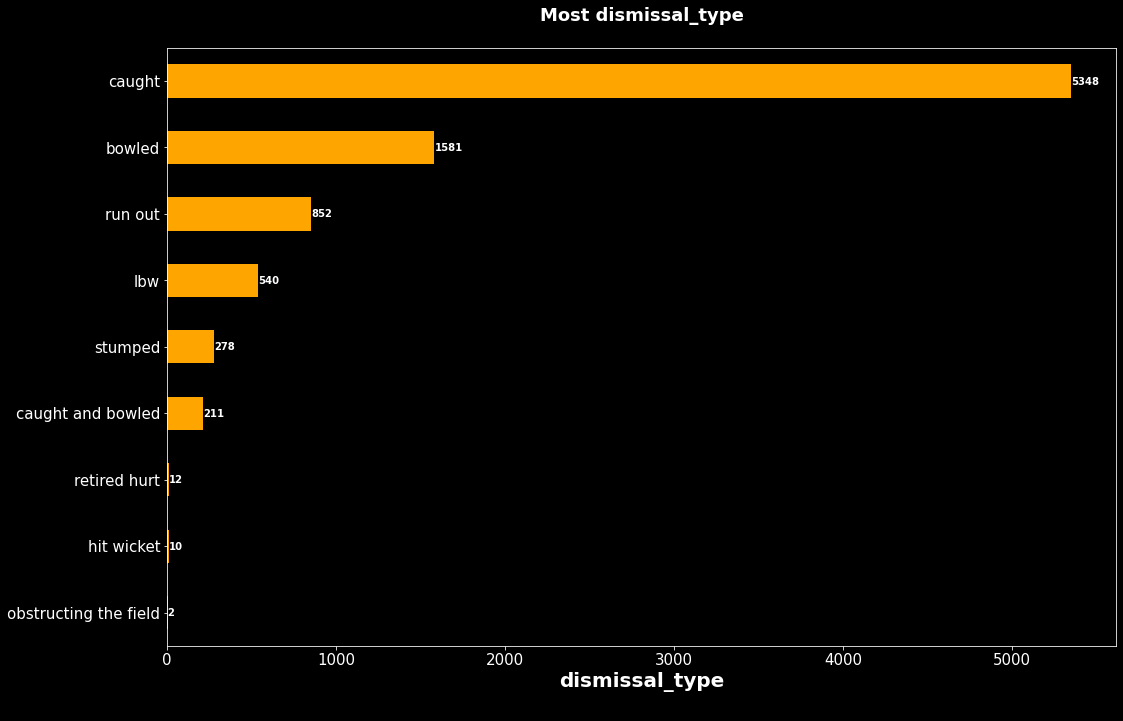

In [169]:
dismissal_type = dismissal_type.plot(kind='barh',figsize=(17,11),color='orange',fontsize=15)
plt.style.use('dark_background')
dismissal_type.set_title('Most dismissal_type\n',fontsize=18,fontweight='bold')
dismissal_type.set_xlabel('dismissal_type\n',fontsize=20,fontweight='bold')

dismissal_type.invert_yaxis()

for i in dismissal_type.patches:
  dismissal_type.text(i.get_width()+0.5,i.get_y()+.30,i.get_width(),fontsize=10,fontweight='bold', color ='white')

In [170]:
super_over = df_deliveries['is_super_over'].value_counts()
super_over

0    178997
1        81
Name: is_super_over, dtype: int64

In [171]:
super_over = df_deliveries['is_super_over'].replace(to_replace=1,value='Yes',inplace=True)
super_over = df_deliveries['is_super_over'].replace(to_replace=0,value='No',inplace=True)

In [172]:
super_over = df_deliveries['is_super_over'].value_counts()
super_over

No     178997
Yes        81
Name: is_super_over, dtype: int64

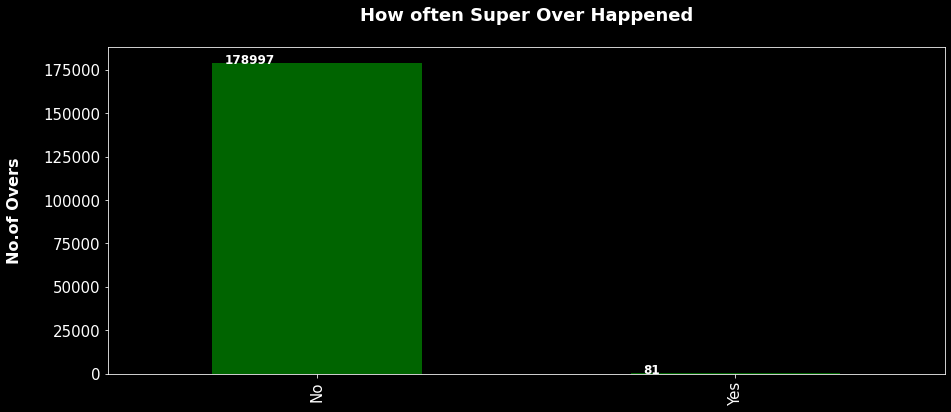

In [173]:
super_over = super_over.plot(kind='bar',figsize=(15,6),color='darkgreen',fontsize=15)
plt.style.use('dark_background')
super_over.set_title('How often Super Over Happened\n',fontsize=18,fontweight='bold')
super_over.set_ylabel('No.of Overs\n',fontsize=16,fontweight='bold')

for i in super_over.patches:
  super_over.text(i.get_x()+0.03,i.get_height()+.60,i.get_height(),fontsize=12,fontweight='bold', color ='white')

In [174]:
close_matches_by1run = df_matches.win_by_runs[df_matches.win_by_runs==1].value_counts()
close_matches_by1run

1    10
Name: win_by_runs, dtype: int64

In [175]:
close_matches_by1run = df_matches.winner[df_matches.win_by_runs==1].value_counts()
close_matches_by1run

Mumbai Indians                 3
Kings XI Punjab                2
Royal Challengers Bangalore    2
Gujarat Lions                  1
Chennai Super Kings            1
Delhi Daredevils               1
Name: winner, dtype: int64

In [176]:
close_matches_by1wickets = df_matches.win_by_wickets[df_matches.win_by_wickets==1].value_counts()
close_matches_by1wickets

1    3
Name: win_by_wickets, dtype: int64

### Thank You.